# 01-LeNet5

![](https://images.unsplash.com/photo-1495592528496-a143a67931d6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Pietro Jeng](https://unsplash.com/photos/sQVXS8HBPPc)

In this exercise, we will apply the LeNet5 algorithm to the Fashion MNIST dataset and improve your performances.

We will first download the data:

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [16]:
# Download the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As you already know, this dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

You can have a look at some images if needed, even if you already know them.

In [17]:
# TODO: Explore the data, display some input images
X_train.shape

(60000, 28, 28)

In [18]:
labels_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

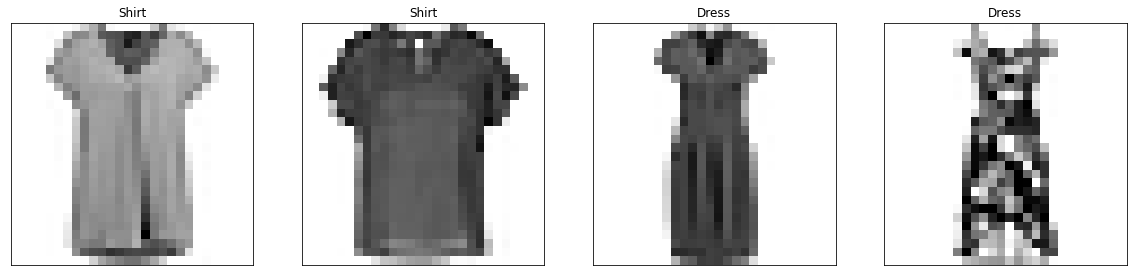

In [19]:
size = 4
sample_graph = np.random.randint(0,60000, size)

sample_images = X_train[sample_graph]
sample_labels = y_train[sample_graph]

plt.figure(figsize = (20,10))

ax =[]

for i in range(1,size+1):
    ax.append(plt.subplot(size // 4 + 1,4,i))
    plt.imshow(sample_images[i-1].reshape((28,28)), cmap='gray_r')
    ax[i-1].title.set_text(labels_map[sample_labels[i-1]])
    ax[i-1].set_xticks([])
    ax[i-1].set_yticks([])

plt.show()

Make the data preparation and preprocessing: scale and reshape the data, put the labels to the good shape.

In [20]:
# TODO: Make the data preparation
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255

Now build the LeNet5 architecture. You can reuse the one of the course, or try to build it by yourself.

The architecture is the following:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1WteTU2FPIVMkBKmMxGpFm5OjsX-szTbB">
</p>

In [21]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [32]:
# TODO: Build your model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

In [56]:
def lenet5():
  model = Sequential()
  model.add(Conv2D(6, kernel_size=(5,5), padding='valid', input_shape=(28,28,1), activation='relu', kernel_regularizer=l2(0.01)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='relu', kernel_regularizer=l2(0)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(120, activation='relu', kernel_regularizer=l2(0)))
  model.add(Dropout(0))
  model.add(Dense(84, activation='relu', kernel_regularizer=l2(0)))
  model.add(Dropout(0))
  model.add(Dense(10, activation='softmax'))

  return model

Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [57]:
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             TensorBoard(log_dir='./Graph')]

In [58]:
# TODO: Compile and fit your model
model = lenet5()

In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=.15, batch_size=64, epochs=500, callbacks=callbacks)

Epoch 1/500
797/797 [==============================] - 5s 6ms/step - loss: 0.6787 - accuracy: 0.7603 - val_loss: 0.5037 - val_accuracy: 0.8168
Epoch 2/500
797/797 [==============================] - 5s 6ms/step - loss: 0.4575 - accuracy: 0.8408 - val_loss: 0.4682 - val_accuracy: 0.8374
Epoch 3/500
797/797 [==============================] - 4s 6ms/step - loss: 0.4019 - accuracy: 0.8582 - val_loss: 0.3902 - val_accuracy: 0.8632
Epoch 4/500
797/797 [==============================] - 4s 6ms/step - loss: 0.3704 - accuracy: 0.8702 - val_loss: 0.3749 - val_accuracy: 0.8664
Epoch 5/500
797/797 [==============================] - 4s 6ms/step - loss: 0.3471 - accuracy: 0.8774 - val_loss: 0.3563 - val_accuracy: 0.8734
Epoch 6/500
797/797 [==============================] - 4s 6ms/step - loss: 0.3287 - accuracy: 0.8826 - val_loss: 0.3548 - val_accuracy: 0.8790
Epoch 7/500
797/797 [==============================] - 4s 6ms/step - loss: 0.3119 - accuracy: 0.8895 - val_loss: 0.3334 - val_accuracy: 0.8812

Have a look at the tensorboard and see if it gives a deeper understanding of your model.

Compute then the accuracy of your model. Is it better than a regular MLP used a couple of days ago?

In [60]:
# TODO: Compute the accuracy of your model
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3555 - accuracy: 0.8899
Accuracy:  0.8899000287055969


We will now add image augmentation to improve our results, especially we will try to reduce overfitting this way.

To do so, you can use `ImageDataGenerator` from Keras that makes all the work for you (including rescaling), with the following parameter: 
* `horizontal_flip=True`

Begin by creating an object `ImageDataGenerator` with this parameter.

In [61]:
# TODO: Instantiate an ImageDataGenerator object
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(X_train)

In [66]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=64), validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // 64, epochs=500, callbacks=callbacks)

Epoch 1/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1579 - accuracy: 0.9429 - val_loss: 0.3496 - val_accuracy: 0.8970
Epoch 2/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1578 - accuracy: 0.9434 - val_loss: 0.3525 - val_accuracy: 0.9031
Epoch 3/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1575 - accuracy: 0.9440 - val_loss: 0.3538 - val_accuracy: 0.9004
Epoch 4/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1545 - accuracy: 0.9448 - val_loss: 0.3715 - val_accuracy: 0.8965
Epoch 5/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1512 - accuracy: 0.9450 - val_loss: 0.3435 - val_accuracy: 0.9022
Epoch 6/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1510 - accuracy: 0.9461 - val_loss: 0.3543 - val_accuracy: 0.8992
Epoch 7/500
937/937 [==============================] - 7s 7ms/step - loss: 0.1515 - accuracy: 0.9448 - val_loss: 0.3559 - val_accuracy: 0.9041

In [67]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3845 - accuracy: 0.9025
Accuracy:  0.9024999737739563


Then you have to fit your `ImageDataGenerator` on your training set of images before any preprocessing.

In [ ]:
# TODO: fit your ImageDataGenerator object

Finally, you can train your model using this generator, with the method `fit_generator` of your model and the method `flow` of your `ImageDataGenerator`.

In [ ]:
# TODO: train your model

Recompute the accuracy of your model, does it improve your performances with data augmentation?

In [ ]:
# TODO: Compute the accuracy of your model

You can now try to improve even more your results. For example, add more parameters to your `ImageDataGenerator`, play with some hyperparameters, and so on...